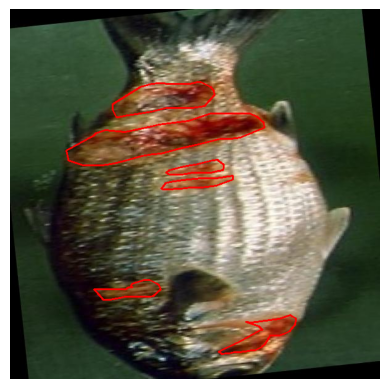

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_image_with_annotation(image_path, annotation_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not found at {image_path}")
        return

    # Convert image from BGR (OpenCV format) to RGB (for Matplotlib display)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read the annotation file
    try:
        with open(annotation_path, "r") as file:
            annotations = file.readlines()
    except FileNotFoundError:
        print(f"Error: Annotation file not found at {annotation_path}")
        return

    # Parse each line of the annotation file
    for annotation in annotations:
        data = annotation.strip().split()
        class_index = int(data[0])  # First value is the class index (not used here)
        points = list(map(float, data[1:]))  # Remaining values are normalized coordinates

        # Convert normalized coordinates to pixel values
        polygon = [(int(points[i] * image.shape[1]), int(points[i + 1] * image.shape[0])) 
                   for i in range(0, len(points), 2)]

        # Draw the polygon on the image
        pts = np.array(polygon, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], isClosed=True, color=(255, 0, 0), thickness=2)  # Red color

    # Display the image with annotations
    # plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Example usage
image_path = "dataset\\val\\images\\6daaaaa8-Bacterial-Red-disease-8-_jpeg.rf.6872b55c91a12b505e26e02c1dfb8c1d.jpg"  # Replace with your image path
annotation_path = "dataset\\val\\label\\6daaaaa8-Bacterial-Red-disease-8-_jpeg.rf.6872b55c91a12b505e26e02c1dfb8c1d.txt"  # Replace with your annotation path
visualize_image_with_annotation(image_path, annotation_path)


In [14]:
import os
import cv2

def find_image_and_get_dimensions(image_name, search_directory):
    """
    Searches for an image by name in the given directory and returns its dimensions.

    :param image_name: Name of the image to search for (e.g., 'image.jpg').
    :param search_directory: Directory to search for the image.
    :return: Tuple of (image_path, width, height) if found, otherwise None.
    """
    for root, _, files in os.walk(search_directory):
        for file in files:
            if file == image_name:
                image_path = os.path.join(root, file)
                # Load the image
                image = cv2.imread(image_path)
                if image is not None:
                    height, width = image.shape[:2]
                    return image_path, width, height
                else:
                    print(f"Error: Unable to load image at {image_path}")
                    return None
    print(f"Image '{image_name}' not found in '{search_directory}'")
    return None

# Example usage
search_dir = "C:\\Users\\Hashan\\Desktop\\test\\dataset\\train"  # Replace with the directory to search
image_name = "e0e52d86-Fungal-diseases-Saprolegniasis-8-_jpeg.rf.19089e0e8e345b14539953d52c5f07bf.jpg"          # Replace with the name of the image

result = find_image_and_get_dimensions(image_name, search_dir)
if result:
    image_path, width, height = result
    print(f"Image found: {image_path}")
    print(f"Width: {width}, Height: {height}")
else:
    print("Image not found.")


Image found: C:\Users\Hashan\Desktop\test\dataset\train\e0e52d86-Fungal-diseases-Saprolegniasis-8-_jpeg.rf.19089e0e8e345b14539953d52c5f07bf.jpg
Width: 600, Height: 600
